<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 10 - Funciones de excitación disipativas
#### Lugano Damian

-------------------------

## Punto 1
### Consigna

![Alt text](./pics/Consigna.png)

### Desarrollo analítico

In [4]:
from IPython.display import IFrame
IFrame("./docs/TS10_1.pdf", width=950, height=1000)

#### Simulación simbólica

In [5]:
### ---- Imports ----

import sympy as sp
from pytc2.sintesis_dipolo import foster
from pytc2.dibujar import dibujar_foster_serie, dibujar_foster_derivacion
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s

### ---- Variable Compleja

s = sp.symbols('s ', complex=True)

Z = (s**2 + 6*s + 8)/(s**2 + 4*s + 3)

print_latex(a_equal_b_latex_s('Z(s)', Z))

<IPython.core.display.Math object>

In [6]:
### Remocion parcial en inf para imponer un cero en sigma=-6

from pytc2.remociones import remover_valor_en_dc, remover_valor_en_infinito, remover_polo_sigma

sigma_R1C1 = -6

Z2, Z1 = remover_valor_en_dc(Z, sigma_zero = sigma_R1C1 )

print_latex(a_equal_b_latex_s('Z_1', Z1))
print_latex(a_equal_b_latex_s('Z_2', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:
Y4, YR1C1, R1, C1 = remover_polo_sigma(1/Z2, sigma=sigma_R1C1, isImpedance=False, isRC=True)

print_latex(a_equal_b_latex_s('Y_3', YR1C1))
print_latex(a_equal_b_latex_s('Y_4', Y4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [8]:
sigma_R2C2 = -3.5

Z6, Z2 = remover_valor_en_dc(1/Y4, sigma_zero = sigma_R2C2 )

print_latex(a_equal_b_latex_s('Z_6', Z6))
print_latex(a_equal_b_latex_s('Z_2', Z2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
Y8, YR2C2, R2, C2 = remover_polo_sigma(1/Z6, sigma=sigma_R2C2, isImpedance=False, isRC=True)

print_latex(a_equal_b_latex_s('Y_5', YR2C2))
print_latex(a_equal_b_latex_s('Y_8', Y8))

Z3=1/Y8

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
###----- Valores de R y C ----

print_latex(a_equal_b_latex_s('Z_1', Z1))
print_latex(a_equal_b_latex_s('R_1', R1))
print_latex(a_equal_b_latex_s('C_1', C1))
print_latex(a_equal_b_latex_s('Z_2', Z2))
print_latex(a_equal_b_latex_s('R_2', R2))
print_latex(a_equal_b_latex_s('C_2', C2))
print_latex(a_equal_b_latex_s('Z_3', Z3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie, dibujar_tanque_RC_derivacion,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC

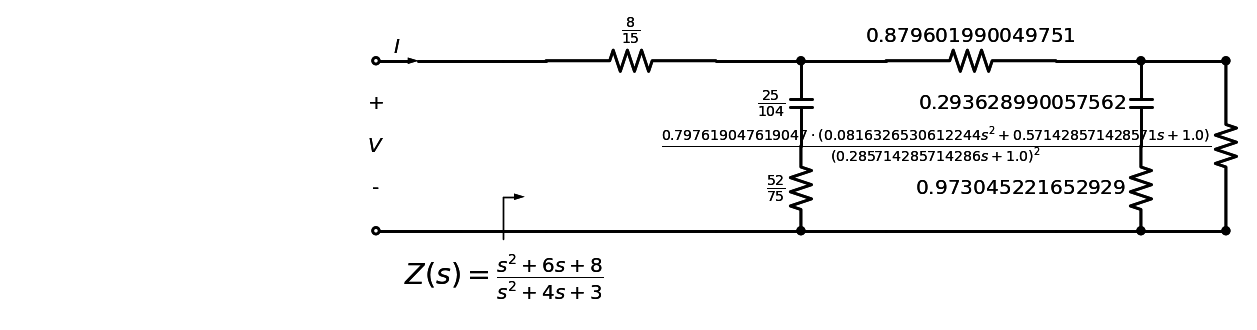

In [12]:
# Red resultante
d = dibujar_puerto_entrada('',
                        voltage_lbl = ('+', '$V$', '-'), 
                        current_lbl = '$I$')

d, zz_lbl = dibujar_funcion_exc_abajo(d, 
                 'Z(s)',  
                 Z, 
                 hacia_salida = True,
                 k_gap_width = 0.5)

d = dibujar_elemento_serie(d, Resistor, Z1)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_derivacion(d, sym_R_label= R1, capacitor_lbl= C1 )

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_serie(d, Resistor, Z2)

d = dibujar_espacio_derivacion(d)

d = dibujar_tanque_RC_derivacion(d, sym_R_label= R2, capacitor_lbl= C2)

d = dibujar_espacio_derivacion(d)

d = dibujar_elemento_derivacion(d, Resistor, 1/Z3)


display(d)

Por un error de precisión de las variables que se fue arrastrando a lo largo del desarrollo no queda exactamente el valor que debería en la última resistencia y no se cancelan los polos y ceros. El verdadero valor de $Z3=84/67=1,254$

### Punto 2

#### Consigna

![Alt text](./pics/Consigna2.png)

#### Desarrollo

In [13]:
from IPython.display import IFrame
IFrame("./docs/TS10_2.pdf", width=950, height=1000)

#### Extra: Verificación con la MAI

In [14]:
from pytc2.cuadripolos import Z2Tabcd_s, Y2Tabcd_s, Tabcd2Z_s, Tabcd2Y_s
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from pytc2.cuadripolos import calc_MAI_impedance_ij, calc_MAI_vtransf_ij_mn, calc_MAI_ztransf_ij_mn

In [15]:
# ----------- Variables -----------

S=sp.symbols('S', complex=True)
#R1, R2, R3, C1, C2, L1 = sp.symbols('R1 R2 R3 C1 C2 L1', real=True, positive=True)

R1= 1/2
R2= 1/16
R3= 13/48
C1= 1
C2= 64/13
L1= 1/4


In [16]:
# ------------ MAI ---------------
Ymai = sp.Matrix([
                    [  S*C1,                   0,                   -S*C1,                      0],
                    [     0,    (1/R1+S*C2+1/R3),                   -1/R1,           -(S*C2+1/R3)],
                    [ -S*C1,               -1/R1,   S*C1+1/R1+1/(S*L1+R2),           -1/(S*L1+R2)],
                    [     0,        -(S*C2+1/R3),            -1/(S*L1+R2),   1/(S*L1+R2)+S*C2+1/R3]
                 ])

print('MAI:')
print_latex(a_equal_b_latex_s('Ymai', Ymai))

MAI:


<IPython.core.display.Math object>

In [17]:
Zmai = calc_MAI_impedance_ij(Ymai, 0, 1, verbose=False)

Zmai=sp.nsimplify(Zmai)
Zmai=sp.simplify(Zmai)

print_latex(a_equal_b_latex_s('Z_{01}', Zmai))

<IPython.core.display.Math object>

#### Extra 2: Verificación con cuadripolos

In [18]:
TC1= sp.Matrix  ([ 
                    [1, 1/S*C1],
                    [0, 1]
                ])

TR1= sp.Matrix  ([ 
                    [1, 0],
                    [1/R1, 1]
                ])

TL1= sp.Matrix  ([ 
                    [1, S*L1],
                    [0, 1]
                ])

TR2= sp.Matrix  ([ 
                    [1, R2],
                    [0, 1]
                ])

TC2= sp.Matrix  ([ 
                    [1, 0],
                    [S*C2, 1]
                ])

TR3= sp.Matrix  ([ 
                    [1, 0],
                    [1/R3, 1]
                ])

In [24]:
T=TC1*TR1*TL1*TR2*TC2*TR3

T=sp.expand(T)
T=sp.nsimplify(T)
T=sp.expand(T)

print_latex(a_equal_b_latex_s('T', T))

<IPython.core.display.Math object>

In [30]:
Zi=T[0,0]/T[1,0]

Zi=sp.expand(Zi)
Zi=sp.simplify(Zi)

print_latex(a_equal_b_latex_s('Z_i', Zi))

<IPython.core.display.Math object>